In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

#读取mnist数据集
mnist=input_data.read_data_sets('/tmp/data/',dtype=tf.uint8,one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [2]:
images=mnist.train.images

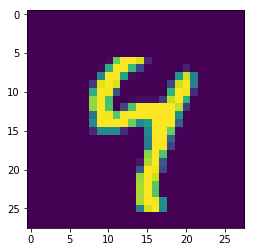

In [3]:
image_0=np.reshape(images[2],(28,28))
image_0.shape
import matplotlib.pyplot as plt
plt.imshow(image_0)
plt.show()

In [4]:
labels=mnist.train.labels

In [5]:
pixls=images.shape[1]

In [6]:
num_examples=mnist.train.num_examples

In [7]:
num_examples

55000

In [8]:
np.argmax(labels[2])

4

In [9]:
filename="cc/output.tfrecords"

writer=tf.python_io.TFRecordWriter(filename)
for index in range(num_examples):
    image_raw=images[index].tostring()
    example=tf.train.Example(features=tf.train.Features(feature={
        'pixels':_int64_feature(pixls),
        'label':_int64_feature(np.argmax(labels[index])),
        'image_raw':_bytes_feature(image_raw)
    }))
    writer.write(example.SerializeToString())
writer.close()
print("文件已经保存！")

文件已经保存！


## 读取文件

In [10]:
reader=tf.TFRecordReader()
filename_queue=tf.train.string_input_producer(["cc/output.tfrecords"])
_,serialized_example=reader.read(filename_queue)
features=tf.parse_single_example(
    serialized_example,
    features={
        'image_raw':tf.FixedLenFeature([],tf.string),
        'pixels':tf.FixedLenFeature([],tf.int64),
        'label':tf.FixedLenFeature([],tf.int64) 
    }
)
images=tf.decode_raw(features['image_raw'],tf.uint8)
labels=tf.cast(features['label'],tf.int32)
pixels=tf.cast(features['pixels'],tf.int32)
sess=tf.Session()
coord=tf.train.Coordinator()
threads=tf.train.start_queue_runners(sess,coord)
for i in range(10):
    image,label,pixl=sess.run([images,labels,pixels])
    

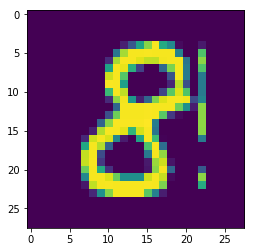

In [11]:
image=np.reshape(image,(28,28))
plt.imshow(image)
plt.show()

In [20]:
images=mnist.train.images

In [21]:
images_5000=np.reshape(images[50000],(28,28))

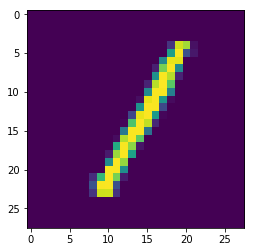

In [22]:
plt.imshow(images_5000)
plt.show()

## 制作狗的TFRECORD文件

In [29]:
import os
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
cwd='E:\\aa\\'
classes={'husky','chihuahua'}#认为设定为两类
writer=tf.python_io.TFRecordWriter('dog_train.tfrecords')#要生成的文件
for index,name in enumerate(classes):
    class_path=cwd+name+"\\"
    for img_name in os.listdir(class_path):
        img_path=class_path+img_name
        img=Image.open(img_path)
        img=img.resize((128,128))
        img_raw=img.tobytes()#将格式转化为二进制格式
        example=tf.train.Example(features=tf.train.Features(feature={
            'label':tf.train.Feature(int64_list=tf.train.Int64List(value=[index])),
            'img_raw':tf.train.Feature(bytes_list=tf.train.BytesList(value=[img_raw]))
        }))
        writer.write(example.SerializeToString())
writer.close()

## 读取TFRECORD文件

In [30]:
def read_and_decode(filename):
    filename_queue=tf.train.string_input_producer([filename])#生成一个queue队列
    reader=tf.TFRecordReader()
    _,serialized_example=reader.read(filename_queue)#返回文件名和文件
    features=tf.parse_single_example(
        serialized_example,
        features={
            'label':tf.FixedLenFeature([],tf.int64),
            'img_raw':tf.FixedLenFeature([],tf.string)
        }
    )
    img=tf.decode_raw(features['img_raw'],tf.uint8)
    img=tf.reshape(img,[128,128,3])
    #img=tf.cast(img,tf.float32)* (1. / 255) - 0.5
    label=tf.cast(features['label'],tf.int32)
    return img,label


In [31]:
images,labels=read_and_decode('dog_train.tfrecords')

In [32]:
images

<tf.Tensor 'Reshape_3:0' shape=(128, 128, 3) dtype=uint8>

In [33]:
import os
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
cwd='E:\\aa\\bb\\'
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    coord=tf.train.Coordinator()
    threads=tf.train.start_queue_runners(coord=coord)
    for i in range(20):
        example,l=sess.run([images,labels])
        img=Image.fromarray(example,'RGB')
        img.save(cwd+str(i)+'_''label_'+str(l)+'.jpg')
        #print(example,l)
    coord.request_stop()
    coord.join(threads)

## 把dog写成两个tfrecord文件

In [17]:
import os
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
cwd='E:\\aa\\'
bao='E:\\aa\\bb\\'
classes={'husky','chihuahua'}#认为设定为两类

beat_num=10
num=0
record=0
writer=tf.python_io.TFRecordWriter(bao+'dog_train.tfrecords-'+str(record))#要生成的文件
for index,name in enumerate(classes):
    class_path=cwd+name+"\\"
    for img_name in os.listdir(class_path):
        num=num+1
        if(num>beat_num):
            num=1
            record=record+1
            writer=tf.python_io.TFRecordWriter(bao+'dog_train.tfrecords-'+str(record))
        img_path=class_path+img_name
        img=Image.open(img_path)
        img=img.resize((128,128))
        img_raw=img.tobytes()#将格式转化为二进制格式
        example=tf.train.Example(features=tf.train.Features(feature={
            'label':tf.train.Feature(int64_list=tf.train.Int64List(value=[index])),
            'img_raw':tf.train.Feature(bytes_list=tf.train.BytesList(value=[img_raw]))
        }))
        writer.write(example.SerializeToString())
writer.close()

## 读取两个tfrecord文件

In [2]:
import os
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
cwd='E:\\aa\\'
bao='E:\\aa\\bb\\'

In [3]:
data_path=bao+'dog_train.tfrecord*'
data_paths=tf.gfile.Glob(data_path)
def read_and_decode(data_paths):
    filename_queue=tf.train.string_input_producer(data_paths,shuffle=False)#生成一个queue队列
    reader=tf.TFRecordReader()
    _,serialized_example=reader.read(filename_queue)#返回文件名和文件
    features=tf.parse_single_example(
        serialized_example,
        features={
            'label':tf.FixedLenFeature([],tf.int64),
            'img_raw':tf.FixedLenFeature([],tf.string)
        }
    )
    img=tf.decode_raw(features['img_raw'],tf.uint8)
    img=tf.reshape(img,[128,128,3])
    label=tf.cast(features['label'],tf.int32)
    return img,label

In [4]:
data_paths

['E:\\aa\\bb\\dog_train.tfrecords-0', 'E:\\aa\\bb\\dog_train.tfrecords-1']

In [5]:
images,labels=read_and_decode(data_paths)

In [6]:
images

<tf.Tensor 'Reshape:0' shape=(128, 128, 3) dtype=uint8>

In [7]:
import os
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
cwd='E:\\aa\\bb\\'
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    coord=tf.train.Coordinator()
    threads=tf.train.start_queue_runners(sess=sess,coord=coord)
    for i in range(20):
        example,l=sess.run([images,labels])
        img=Image.fromarray(example,'RGB')
        img.save(cwd+str(i+1)+'_label_'+str(l)+'.jpg')
        #print(example,l)
    coord.request_stop()
    coord.join(threads)

## 把输出转化为batch

In [12]:
import os
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
batch_size=5
capacity=100+3*batch_size
image_batch,label_batch=tf.train.batch([images,labels],batch_size,capacity)


In [13]:
image_batch

<tf.Tensor 'batch_1:0' shape=(5, 128, 128, 3) dtype=uint8>